# Business Case Study: Employee Absenteeism

The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.



# The business Task

The exercise will address `Absenteeism` at a company during work time.

**Problem:** 
The problem is that the work environment of today is more:
- Competitive
- Managers set unachievable business goals
- have an elevated risk of becoming unemployed
This can be lead to an increase in pressure and stress of the employee. Those factors influence employee health, which is of course indesirable.

### What is Absenteeism?
Absence from work during normal working hours resulting in temporary incapacity to execute a regular working activity.

- Based on what information should we predict whether an employee is expected to be absent or not?
- How should we measure absenteeism?

### Purpose of the business exercise:

Explore whether a person presenting certain characteristics is expected to be away from work at some point in time or not.

We want to know for how many working hours any employee could be away from work based on information like:
- How far they live from their workplace.
- How many children and pets they have.
- Do they have higher education?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv('data/Absenteeism_data.csv')
data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


# 1. Getting aquainted with the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
ID                           700 non-null int64
Reason for Absence           700 non-null int64
Date                         700 non-null object
Transportation Expense       700 non-null int64
Distance to Work             700 non-null int64
Age                          700 non-null int64
Daily Work Load Average      700 non-null float64
Body Mass Index              700 non-null int64
Education                    700 non-null int64
Children                     700 non-null int64
Pets                         700 non-null int64
Absenteeism Time in Hours    700 non-null int64
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


The data doesn't have any missing values.

In [4]:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00
mean,17.95,19.41,222.35,29.89,36.42,271.80,26.74,1.28,1.02,0.69,6.76
std,11.03,8.36,66.31,14.80,6.38,40.02,4.25,0.67,1.11,1.17,12.67
min,1.00,0.00,118.00,5.00,27.00,205.92,19.00,1.00,0.00,0.00,0.00
25%,9.00,13.00,179.00,16.00,31.00,241.48,24.00,1.00,0.00,0.00,2.00
50%,18.00,23.00,225.00,26.00,37.00,264.25,25.00,1.00,1.00,0.00,3.00
75%,28.00,27.00,260.00,50.00,40.00,294.22,31.00,1.00,2.00,1.00,8.00
max,36.00,28.00,388.00,52.00,58.00,378.88,38.00,4.00,4.00,8.00,120.00


In [5]:
for column in data.columns:
    print(f"===============Column: {column}==============")
    print(f"Number of unique values: {data[column].nunique()}")
    print(f"Max: {data[column].max()}")
    print(f"Min: {data[column].min()}")

===============Column: ID==============
Number of unique values: 34
Max: 36
Min: 1
===============Column: Reason for Absence==============
Number of unique values: 28
Max: 28
Min: 0
===============Column: Date==============
Number of unique values: 432
Max: 31/10/2017
Min: 01/01/2018
===============Column: Transportation Expense==============
Number of unique values: 24
Max: 388
Min: 118
===============Column: Distance to Work==============
Number of unique values: 24
Max: 52
Min: 5
===============Column: Age==============
Number of unique values: 21
Max: 58
Min: 27
===============Column: Daily Work Load Average==============
Number of unique values: 35
Max: 378.884
Min: 205.917
===============Column: Body Mass Index==============
Number of unique values: 16
Max: 38
Min: 19
===============Column: Education==============
Number of unique values: 4
Max: 4
Min: 1
===============Column: Children==============
Number of unique values: 5
Max: 4
Min: 0
===============Column: Pets=============

In [6]:
data.columns

Index(['ID', 'Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours'],
      dtype='object')

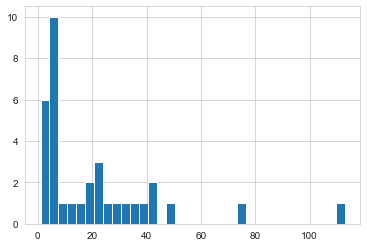

In [7]:
data.ID.value_counts().hist(bins=data.ID.nunique())

`ID`: individual identification (in this case we have 34 employees) indicates precisely who has been away during working hours.  Will this information improve our analysis in any way? No, because it's only a label variable (a number that is there to distinguish the individuals from one another, not to carry any numeric information).

So we are going to drop this column

In [8]:
data.drop('ID', axis=1, inplace=True)

`Reason for Absence`: We have `28` reason of absence from `0` to `28`.

# 2. Exploratory Data Analysis

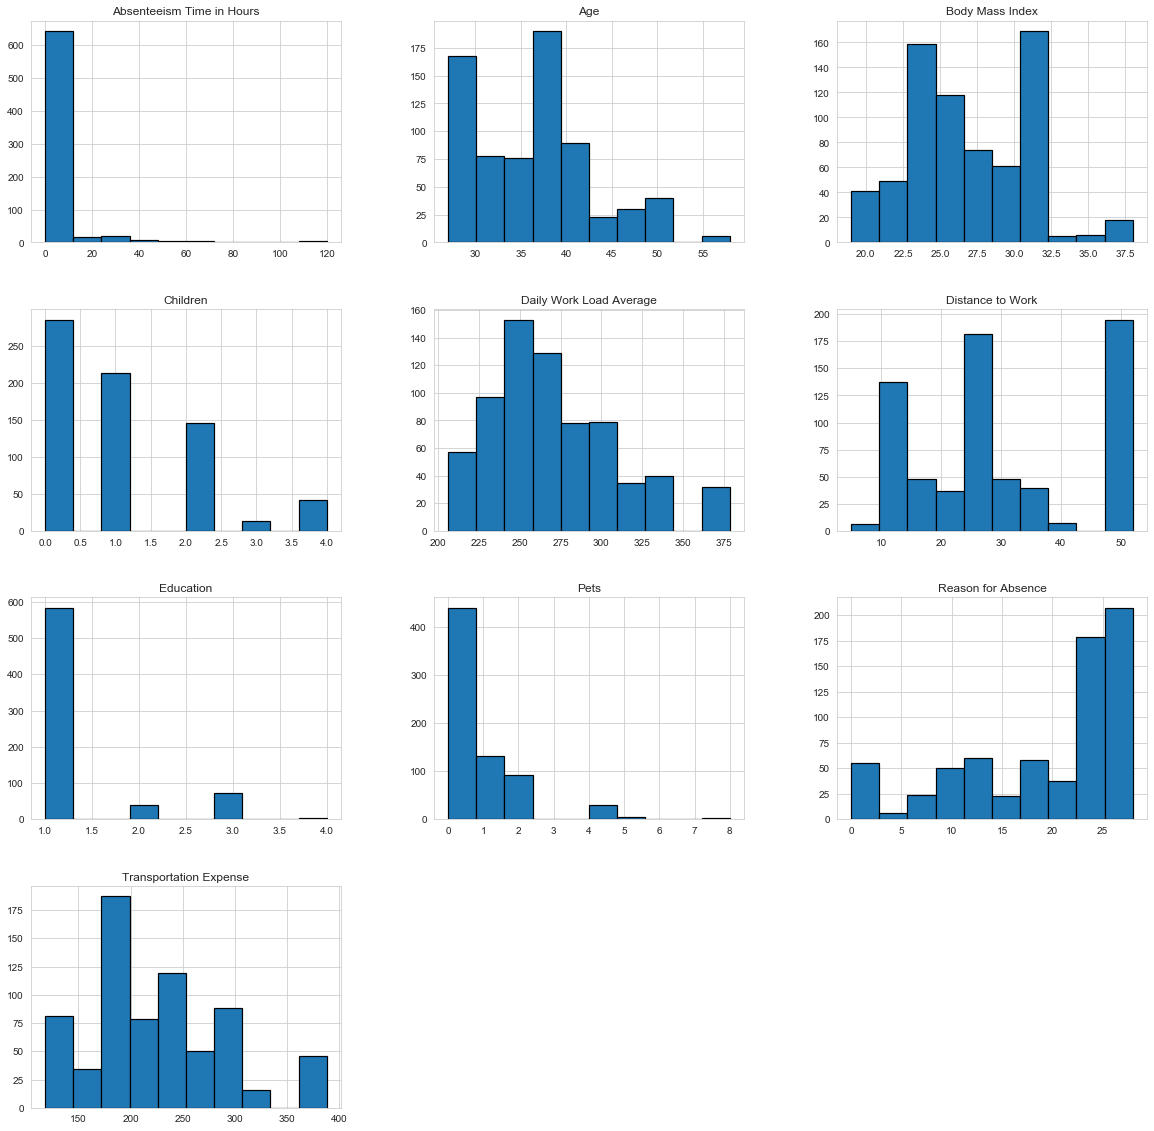

In [9]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [10]:
print(f"{data['Absenteeism Time in Hours'].value_counts()}")
print(f"{data['Absenteeism Time in Hours'].value_counts()[0] / data['Absenteeism Time in Hours'].value_counts()[1]}")

8      195
2      149
3      106
1       87
4       57
0       39
16      18
24      15
40       7
5        7
32       6
64       3
112      2
56       2
80       2
120      2
48       1
7        1
104      1
Name: Absenteeism Time in Hours, dtype: int64
0.4482758620689655


In [11]:
data["Reason for Absence"] = data["Reason for Absence"].map({0: "Group_1", 1: "Group_1", 2: "Group_1", 3: "Group_1", 
                                                             4: "Group_1", 5: "Group_1", 6: "Group_1", 7: "Group_1", 
                                                             8: "Group_1", 9: "Group_1", 10: "Group_1", 11: "Group_1", 
                                                             12: "Group_1", 13: "Group_1", 14: "Group_1", 15: "Group_2", 
                                                             16: "Group_2", 17: "Group_2", 17: "Group_2", 18: "Group_3", 
                                                             19: "Group_3", 20: "Group_3", 21: "Group_3", 22: "Group_4", 
                                                             23: "Group_4", 24: "Group_4", 25: "Group_4", 26: "Group_4", 
                                                             27: "Group_4", 28: "Group_4"})
data["Reason for Absence"] = data["Reason for Absence"].astype("category").cat.codes
data["Reason for Absence"].unique()

array([3, 0, 2, 1], dtype=int64)

In [12]:
data_1 = pd.get_dummies(data, columns=['Reason for Absence'], drop_first=True)

In [13]:
data_1.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason for Absence_1,Reason for Absence_2,Reason for Absence_3
0,07/07/2015,289,36,33,239.55,30,1,2,1,4,0,0,1
1,14/07/2015,118,13,50,239.55,31,1,1,0,0,0,0,0
2,15/07/2015,179,51,38,239.55,31,1,0,0,2,0,0,1
3,16/07/2015,279,5,39,239.55,24,1,2,0,4,0,0,0
4,23/07/2015,289,36,33,239.55,30,1,2,1,2,0,0,1


In [14]:
data_1.dtypes

Date                          object
Transportation Expense         int64
Distance to Work               int64
Age                            int64
Daily Work Load Average      float64
Body Mass Index                int64
Education                      int64
Children                       int64
Pets                           int64
Absenteeism Time in Hours      int64
Reason for Absence_1           uint8
Reason for Absence_2           uint8
Reason for Absence_3           uint8
dtype: object

In [15]:
data_1["Date"] = pd.to_datetime(data_1.Date)

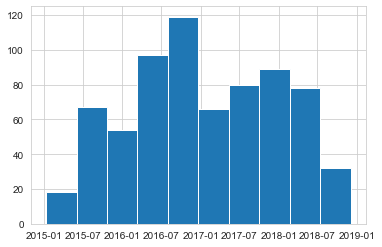

In [16]:
data_1.Date.hist()

In [17]:
data_1['Month'] = data_1.Date.dt.month
data_1.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason for Absence_1,Reason for Absence_2,Reason for Absence_3,Month
0,2015-07-07,289,36,33,239.55,30,1,2,1,4,0,0,1,7
1,2015-07-14,118,13,50,239.55,31,1,1,0,0,0,0,0,7
2,2015-07-15,179,51,38,239.55,31,1,0,0,2,0,0,1,7
3,2015-07-16,279,5,39,239.55,24,1,2,0,4,0,0,0,7
4,2015-07-23,289,36,33,239.55,30,1,2,1,2,0,0,1,7


In [18]:
data_1["Weekday"] = data_1.Date.dt.weekday
data_1["Weekday"]

0      1
1      1
2      2
3      3
4      3
      ..
695    2
696    2
697    3
698    3
699    3
Name: Weekday, Length: 700, dtype: int64

In [19]:
data_1.dtypes

Date                         datetime64[ns]
Transportation Expense                int64
Distance to Work                      int64
Age                                   int64
Daily Work Load Average             float64
Body Mass Index                       int64
Education                             int64
Children                              int64
Pets                                  int64
Absenteeism Time in Hours             int64
Reason for Absence_1                  uint8
Reason for Absence_2                  uint8
Reason for Absence_3                  uint8
Month                                 int64
Weekday                               int64
dtype: object

In [20]:
data_1["Education"] = data_1.Education.map({1: 0, 2: 1, 3: 1, 4: 1})

In [21]:
data_1.Education.value_counts()

0    583
1    117
Name: Education, dtype: int64

In [25]:
data_1.Education.unique()

array([0, 1], dtype=int64)

In [24]:
data_2 = pd.get_dummies(data_1, columns=["Education"])
data_2.columns

Index(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets',
       'Absenteeism Time in Hours', 'Reason for Absence_1',
       'Reason for Absence_2', 'Reason for Absence_3', 'Month', 'Weekday',
       'Education_0', 'Education_1'],
      dtype='object')